<a href="https://colab.research.google.com/github/stalin-dalia/zomato_analysis/blob/main/zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()  # Select your zomato.csv file when prompted


Saving zomato.csv to zomato.csv


In [ ]:
import pandas as pd
df = pd.read_csv("zomato.csv", encoding='latin-1')
df.head()


,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [ ]:
import os
print(os.getcwd())  # This shows where Python is currently looking for files


/content


In [ ]:
# Check available columns
print(df.columns.tolist())


['address', 'name', 'online_order', 'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'listed_in(type)']


In [ ]:
# List of possible unnecessary columns
columns_to_drop = ['url', 'address', 'phone', 'dish_liked', 'reviews_list', 'menu_item', 'listed_in(city)']

# Drop only the columns that are present
df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1, inplace=True)


In [ ]:
# Print column names first to see what needs renaming
print(df.columns.tolist())


['name', 'online_order', 'book_table', 'rate', 'votes', 'location', 'rest_type', 'cuisines', 'approx_cost(for two people)', 'listed_in(type)']


In [ ]:
df.rename(columns={
    'approx_cost(for two people)': 'cost',  # fix if name has different spacing
    'listed_in(type)': 'type'
}, inplace=True)


In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)


In [ ]:
# Show rows where 'cost' contains non-numeric values
df[~df['cost'].astype(str).str.replace(',', '').str.strip().str.replace('.', '').str.isnumeric()]


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
9,service was sluggish as they took too long to...,('Rated 4.0','RATED\n Amazing cafe,\nTop floor,no outdoor seating.\nFood is delicious,a nice place to give a try.'),('Rated 1.0',we had nachos cheese salsa which was okay. We...,it turned out worse than the garlic bread. Th...,parking facility I could not locate. Staff ca...
33,'RATED\n not that much worth'),('Rated 2.0','RATED\n Delay in delivery'),('Rated 1.0',"""""RATED\n Not good and gravy not sufficient ...",'RATED\n it was not worth the money'),('Rated 4.0',('Rated 3.0','RATED\n one item wasnt delivered'),"don't expect too much from this place.."""")"
37,Will Recommend To Everyone.\n\nCheers!!'),('Rated 5.0','RATED\n This was my second time trying faas...,('Rated 5.0','RATED\n The Navaratri special thali of faas...,potato,and 2 chapattis. Each and every bite was a bl...,'RATED\n Faasos is a perfect place to order ...,Veg jumbo roll and paneer cheesy roll.\nThey ...,('Rated 4.5'
42,'RATED\n We enjoyed our dinner,grilled chicken was good,with tandoori roti good combination,always a good experience,good support from staff. Try their kabab'),"""""RATED\n The food was good and the ambience...",although I wanted to have the buffet but wasn...,"""""RATED\n Okay this review is mainly about t...",been to empire a couple of times. Food depend...,Jayanagar
49,and the crust was made amazing also so was th...,('Rated 4.0','RATED\n Loved the foodie experience here!!!...,a mocktail and did i just hear unlimited dess...,Arup and Binita serving us,never have i had such an experience.\nWhat re...,('Rated 5.0',herbed wedges\n\n#rajeshwrites'),('Rated 4.0',and off course pizzas .\nThey serve these tin...
...,...,...,...,...,...,...,...,...,...,...
56225,('Rated 4.0',"""""RATED\n Truly what a wonderful place. From...",it's extremely well set up.\nThe brew was jus...,great tasting and up to the mark.\nFood was v...,('Rated 4.0',Whitefield. They serve a wide range of starters,main course,mocktails and desserts too.\n\nalthingsbeauti...,('Rated 5.0',ambience n live music.\n\nWheat beer... loved...
56227,'RATED\n The beer is not the only good bit h...,('Rated 4.0',"""""RATED\n Went here on a Saturday evening an...",a cheerful atmosphere and good food. We had t...,also strong! Will definitely be visiting soon...,'RATED\n This pub is situated inside VR mall...,('Rated 4.0',more for office parties,as it is spacious and had a very wide variety...,'RATED\n Visited with my friends...had a goo...
56229,'RATED\n Ambience- did not expect a beautifu...,('Rated 3.0',"""""RATED\n A decent place to have some tradit...",but we weren't blown away. It was,as I said about the place,which were good,but felt a little over priced.\nI might just ...,"this shall do."""")",('Rated 4.0',starter and main course was above average. Ho...
56234,'RATED\n Ambiance - 6/10\n\nIt needs to be m...,dirty tables etc... is really a turn off...\n...,but cud be a bit less spicy... otherwise was grt,also a slightly larger portion size wud be mu...,('Rated 2.0',LIIT original had very less liquor,watermelon cocktail had no liquor and more sq...,'RATED\n Nice place to visit if you are arou...,chk sausages (good),they have an amazing view to the concert of t...


In [ ]:
# Keep only valid numeric rows in 'cost'
df = df[df['cost'].astype(str).str.replace(',', '').str.replace('.', '', regex=False).str.strip().str.isnumeric()]


In [ ]:
df['cost'] = df['cost'].astype(str).str.replace(',', '')
df['cost'] = df['cost'].astype(float)


/tmp/ipython-input-11-2602722695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cost'] = df['cost'].astype(str).str.replace(',', '')
/tmp/ipython-input-11-2602722695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cost'] = df['cost'].astype(float)


In [ ]:
# Convert ratings like "4.1/5" to float (e.g., 4.1)
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].apply(lambda x: x.split('/')[0].strip())

# Remove invalid entries like 'NEW' and '-'
df = df[df['rate'] != 'NEW']
df = df[df['rate'] != '-']

# Convert to float
df['rate'] = df['rate'].astype(float)


/tmp/ipython-input-12-979862904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rate'] = df['rate'].astype(str)
/tmp/ipython-input-12-979862904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rate'] = df['rate'].apply(lambda x: x.split('/')[0].strip())


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


/tmp/ipython-input-14-593922035.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='type', order=df['type'].value_counts().index[:10], palette='pastel')


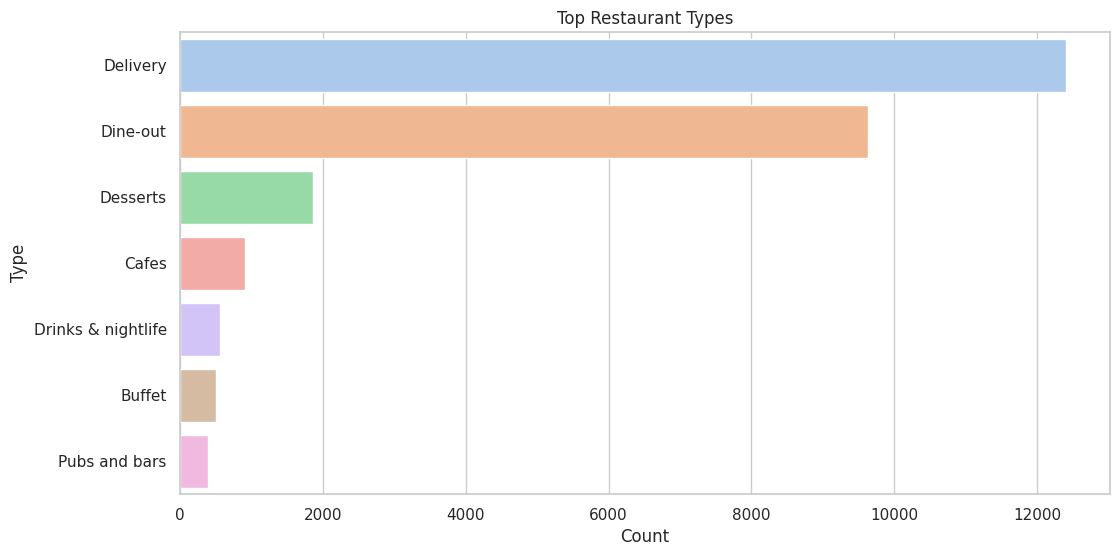

In [ ]:
sns.countplot(data=df, y='type', order=df['type'].value_counts().index[:10], palette='pastel')
plt.title('Top Restaurant Types')
plt.xlabel("Count")
plt.ylabel("Type")
plt.show()


/tmp/ipython-input-15-2215645230.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_locations.index, x=top_locations.values, palette='coolwarm')


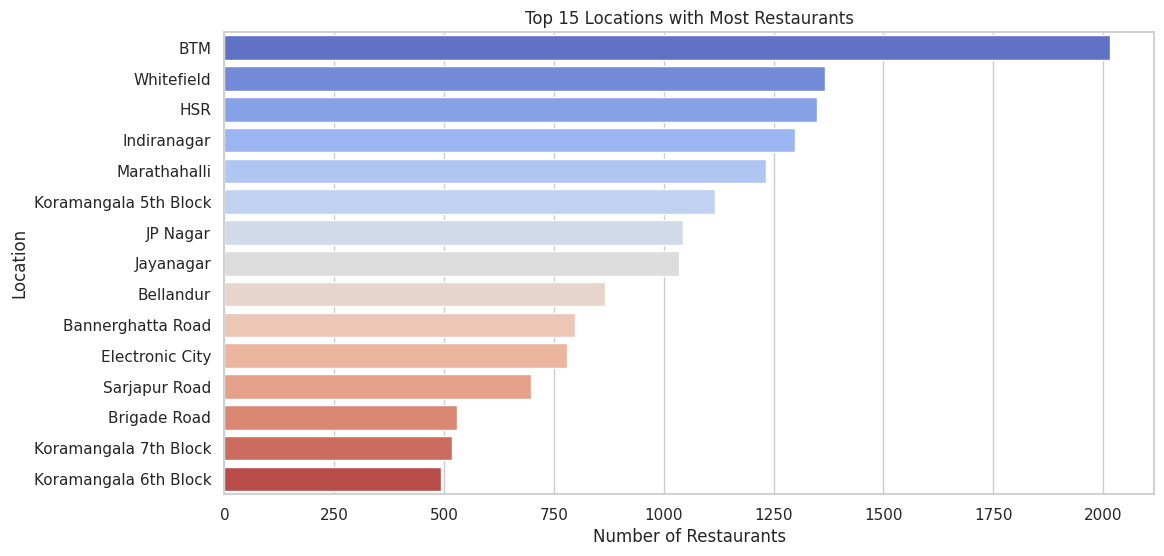

In [ ]:
top_locations = df['location'].value_counts().head(15)
sns.barplot(y=top_locations.index, x=top_locations.values, palette='coolwarm')
plt.title("Top 15 Locations with Most Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("Location")
plt.show()


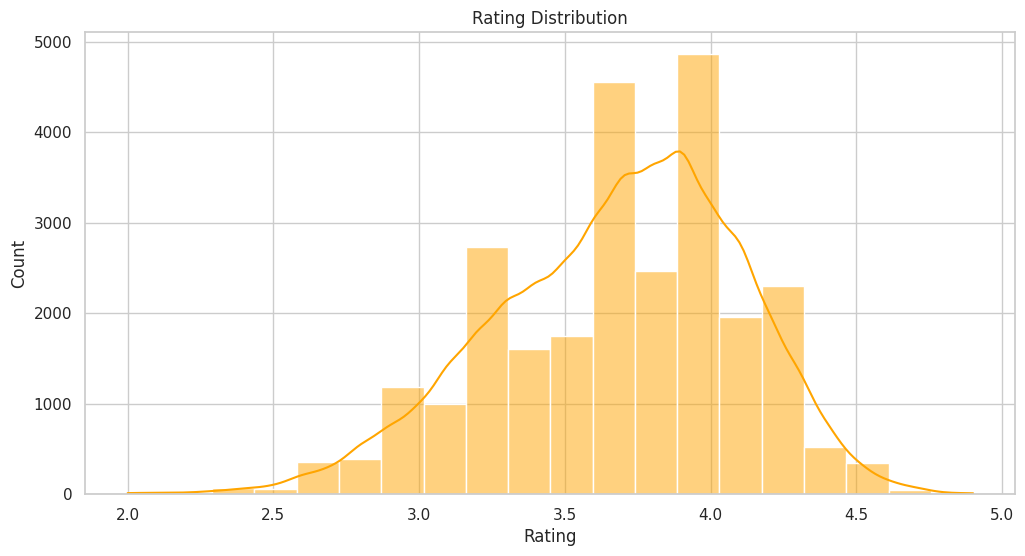

In [ ]:
sns.histplot(df['rate'], bins=20, kde=True, color='orange')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


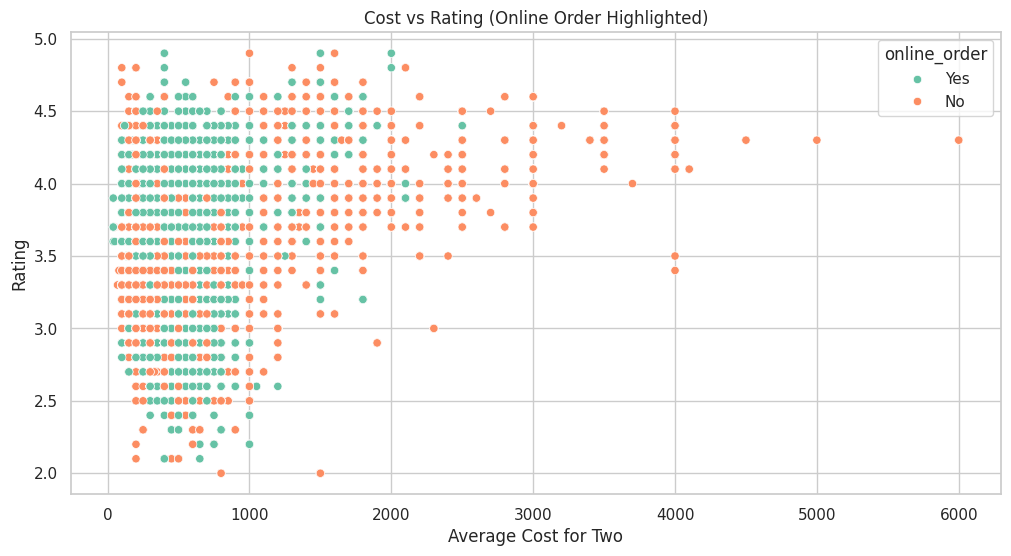

In [ ]:
sns.scatterplot(data=df, x='cost', y='rate', hue='online_order', palette='Set2')
plt.title("Cost vs Rating (Online Order Highlighted)")
plt.xlabel("Average Cost for Two")
plt.ylabel("Rating")
plt.show()
